In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import scipy.signal as sig

from IPython.display import Audio

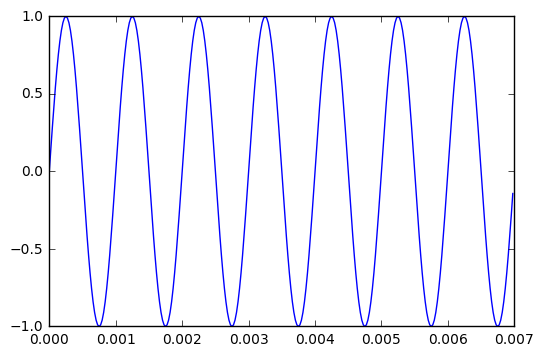

In [37]:
fs = 44000 # 44 kHz sampling

f = 1000 # signal frequency
T = 1/f
tf = 8 # length of signal, sec

pi = np.pi

t = np.arange(fs*tf)/fs # time vector

sine = np.sin(t*2*np.pi*f)


cycles = 7
mask = t<cycles*T # view first 8 cycles
plt.plot(t[mask], sine[mask])

Audio(sine, rate=fs)

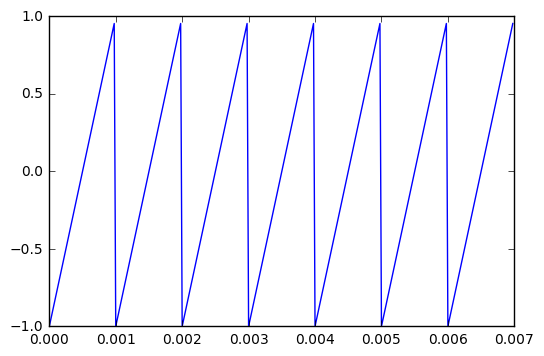

In [40]:
saw = sig.sawtooth(t*2*pi*f)

plt.plot(t[mask], saw[mask])

Audio(saw, rate=fs)

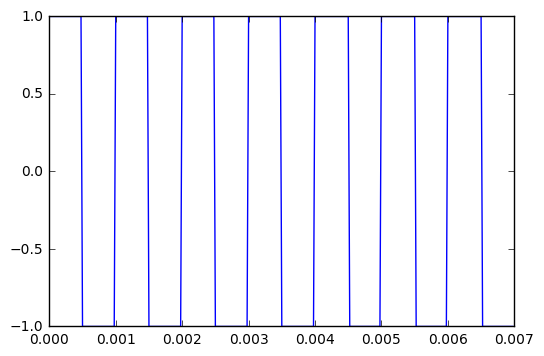

In [41]:
square = sig.square(t*2*pi*f)

plt.plot(t[mask], square[mask])

Audio(square, rate=fs)

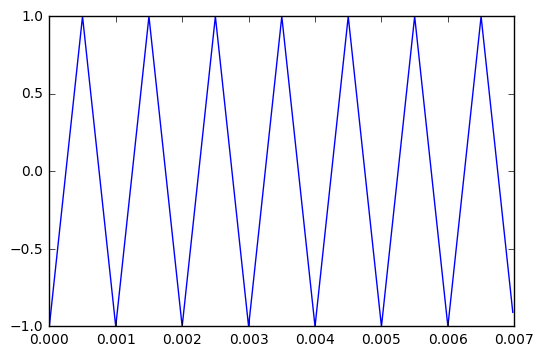

In [47]:
triangle = sig.sawtooth(t*2*pi*f, width=.5)

plt.plot(t[mask], triangle[mask])

Audio(triange, rate=fs)

In [48]:
audio = lambda v: Audio(v, rate=fs)

### Now that we have all of our waves, lets do something with it

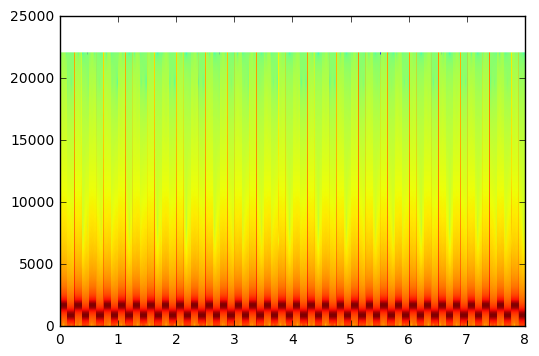

In [151]:
def make_fm(x, fc=100, df=10, Ac=1, fs=fs):
    t = np.arange(len(x))/fs
    dt = 1/fs
    x_int = np.cumsum(x)*dt # integrate
    y = Ac * np.cos(2*pi*(df*x_int+fc*t)) # modulate
    return y

n = len(t)

f_sweep = 4# np.linspace(0, 10, len(t))
sine_2Hz = np.sin(2*pi*t*f_sweep)

s = sig.square(t*2*pi*4)

Am_sweep = 400 # np.linspace(0,.01,len(sine_2Hz))
sine_mod = make_fm(s, 1200, Am_sweep)

te = int(fs/tf * 2)

#plt.subplot(2,1,1)
#plt.plot(t[:], sine_mod[:])
#plt.subplot(2,1,2)
_ = plt.specgram(sine_mod, Fs=fs)

audio(sine_mod)

In [ ]:
# create a filter

